<a href="https://colab.research.google.com/github/MatheusElis/Estatistica-Computacional/blob/main/Exercicios/Exercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider the small image dataset presented here. In order to solve this exercise, you need to:

 - Read/open the images. There are several ways to do it (in Python, in other programming languages);
 - Select image features. Image features are important to represent each image. Select at least two of these features.


Develop a program in order to:

 1. Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item;
 1. Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?
 1. Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?


In [21]:
%%capture
!pip install -U kaleido 
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca 
!apt-get install xvfb libgtk2.0-0 libgconf-2-4


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px 
import plotly.graph_objects as go 
from scipy.stats import poisson, norm
import plotly.io as pio
pio.renderers.default = "png" # setting png as default so images appear in github
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import glob
!apt install unzip
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
from plotly.subplots import make_subplots

# Import Files

In [6]:
%%capture
!mkdir imagens
file_name = 'imagens.zip'
url_file = 'https://github.com/vsantjr/CAP/blob/9f061393f7eb4738d2ef699ce7cee20dde57d8b5/CAP417/Images/imgsmall.zip?raw=true'
!wget --no-cache {url_file} -O {file_name}
!unzip {file_name} -d imagens

In [8]:
imagens_rgb = [imread(file, as_gray=False) for file in glob.glob("/content/imagens/*.JPEG")]
imagens_gs = [imread(file, as_gray=True) for file in glob.glob("/content/imagens/*.JPEG")]

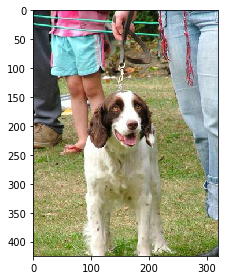

In [9]:
imshow(imagens_rgb[0])

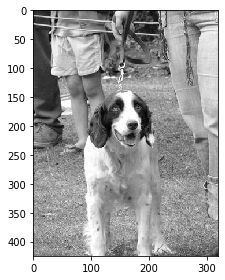

In [10]:
imshow(imagens_gs[0])

# Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item

In [11]:
color_mean = []
h_edges_mean = []
v_edges_mean = []
features = []

for i in range(len(imagens_rgb)): 
  color_mean.append(np.mean(imagens_rgb[i])/255)
  
  h_edges = prewitt_h(imagens_gs[i])

  v_edges = prewitt_v(imagens_gs[i])

  h_edges_mean.append(np.mean(h_edges))
  v_edges_mean.append(np.mean(v_edges))

  features.append([color_mean[i], h_edges_mean[i]])

In [13]:
gmm = GaussianMixture(n_components=6).fit(features) 
labels = gmm.predict(features)

In [51]:
df = pd.DataFrame()
df["images"] = imagens_rgb
df["color_mean"] = color_mean
df["h_edges_mean"] = h_edges_mean
df["v_edges_mean"] = v_edges_mean
df["labels"] = labels
df

,images,color_mean,h_edges_mean,v_edges_mean,labels
0,"[[[32, 40, 43], [35, 43, 46], [36, 44, 47], [3...",0.546188,0.000453,0.001657,5
1,"[[[130, 105, 101], [132, 107, 103], [134, 109,...",0.472838,-0.001352,-0.000587,3
2,"[[[160, 175, 194], [160, 175, 194], [160, 175,...",0.556421,0.001730,0.000068,5
3,"[[[52, 88, 136], [52, 88, 136], [52, 88, 136],...",0.487525,-0.001706,-0.000163,3
4,"[[[58, 34, 6], [58, 34, 6], [59, 35, 7], [60, ...",0.469237,0.000145,-0.000227,3
...,...,...,...,...,...
595,"[[[66, 96, 32], [52, 83, 24], [77, 109, 62], [...",0.471119,0.000772,0.000757,3
596,"[[[27, 29, 0], [30, 30, 0], [32, 32, 0], [33, ...",0.292222,-0.000455,-0.000350,2
597,"[[[255, 253, 254], [255, 253, 254], [255, 253,...",0.454438,-0.002580,-0.001315,3
598,"[[[210, 225, 255], [211, 226, 255], [211, 226,...",0.570146,-0.003001,-0.000016,5


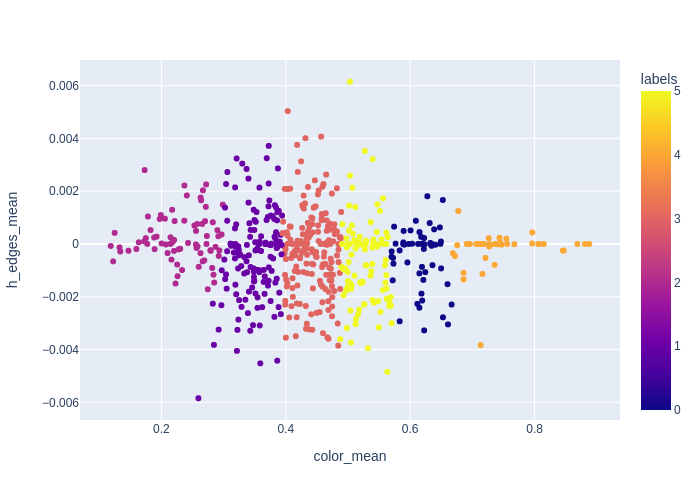

In [18]:
fig = px.scatter(df,x='color_mean',y='h_edges_mean',color='labels')
fig.show()

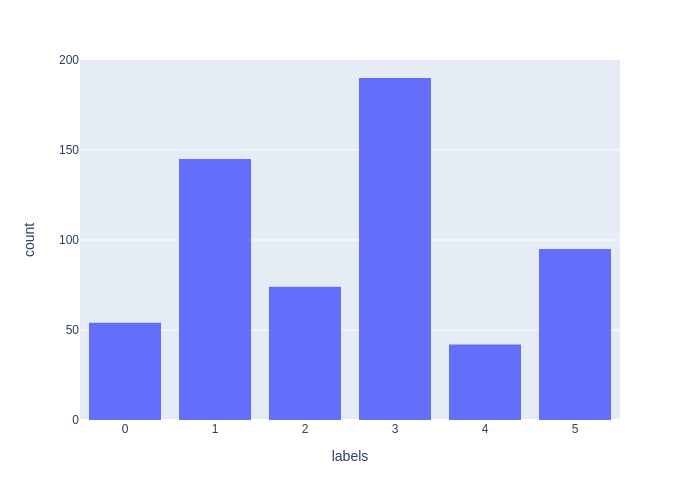

In [19]:
fig = px.histogram(df, x="labels")
fig.update_layout(bargap=0.2)
fig.show()

# Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?

## For each component of RGB Colors Means

In [88]:
n_components = 6
rows = 3
cols = 2


data = []
for n in range(n_components):
    fig = px.histogram(df[df['labels'] == n], x="color_mean", histnorm='probability density', title=f'Label = {n+1}')
    kde = sm.nonparametric.KDEUnivariate(df[df['labels'] == n]['color_mean'])
    kde.fit()
    bandwidth = [0.1, 0.07, 0.04, 0.01]
    for bw in bandwidth:
        kde.fit(bw=bw)
        fig.add_trace(go.Scatter(
            x=kde.support,
            y=kde.density,
            mode='lines',
            name=f'bw = {bw}'
        ))
    fig.update_xaxes(range=[min(df[df['labels'] == n]['color_mean']), max(df[df['labels'] == n]['color_mean'])])
    data.append(fig)


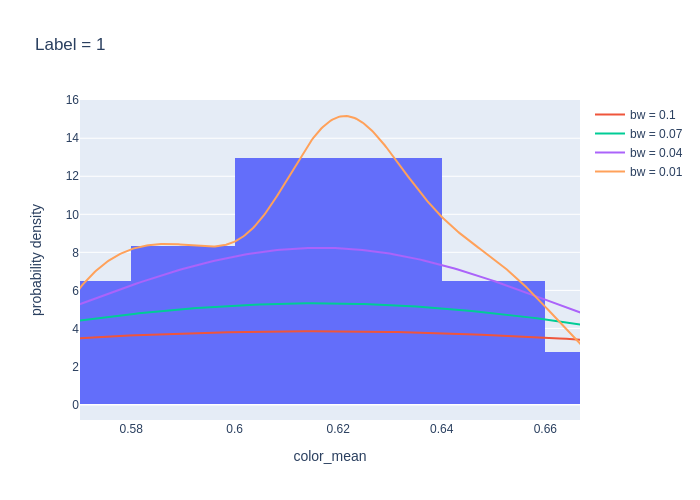

In [89]:
data[0]

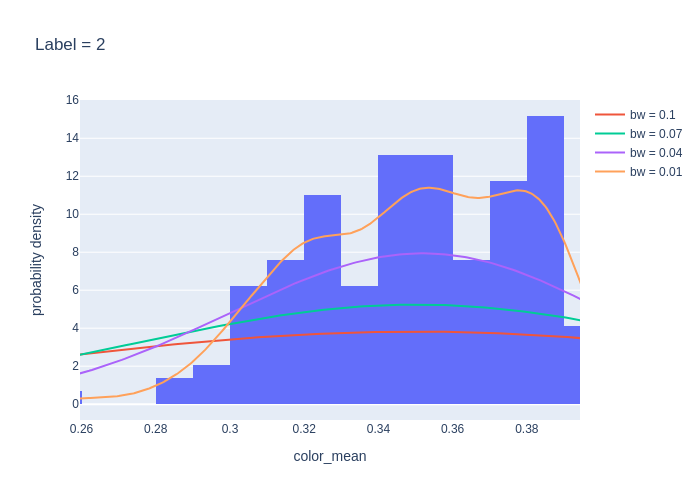

In [90]:
data[1]

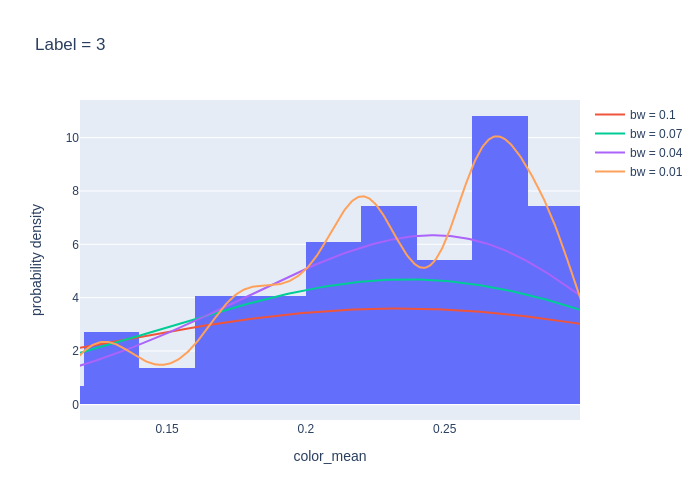

In [91]:
data[2]

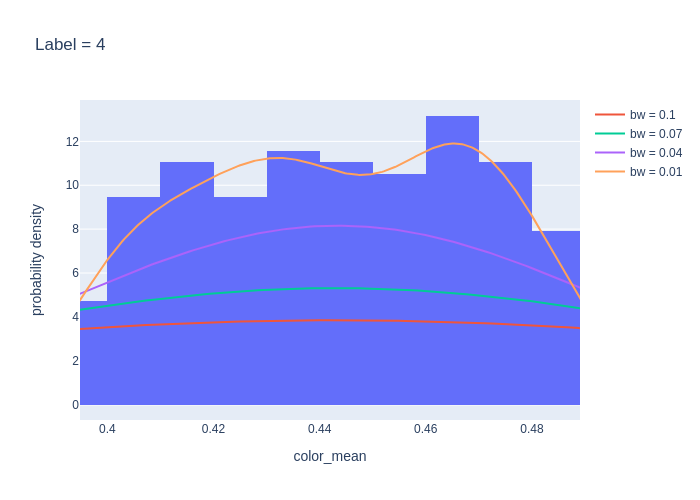

In [92]:
data[3]

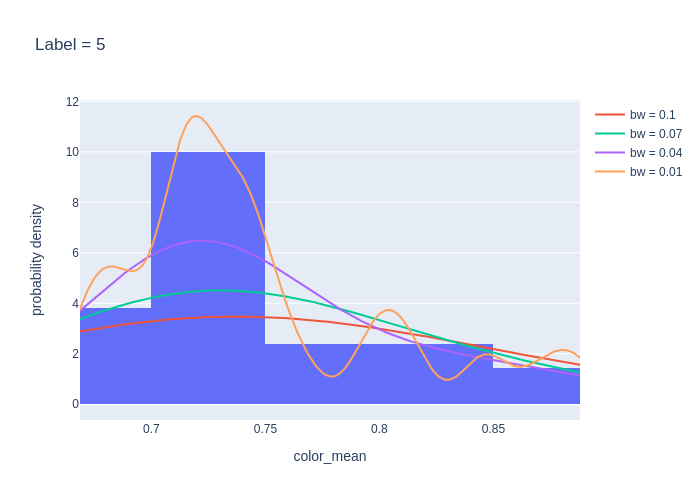

In [93]:
data[4]

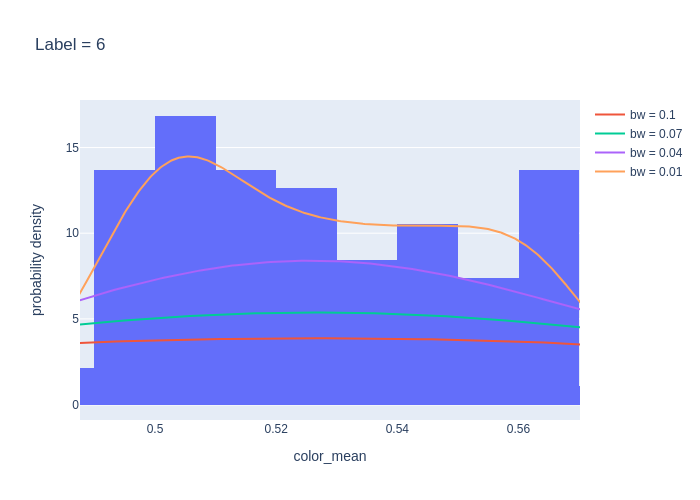

In [94]:
data[5]

### The best bandwidth for all cases = 0.01

## For each component of Horizontal Edges Means

In [106]:
n_components = 6

data = []
for n in range(n_components):
    fig = px.histogram(df[df['labels'] == n], x="h_edges_mean", histnorm='probability density', title=f'Label = {n+1}')
    kde = sm.nonparametric.KDEUnivariate(df[df['labels'] == n]['h_edges_mean'])
    kde.fit()
    bandwidth = [0.001, 0.0007, 0.0004, 0.0002, 0.0001]
    for bw in bandwidth:
        kde.fit(bw=bw)
        fig.add_trace(go.Scatter(
            x=kde.support,
            y=kde.density,
            mode='lines',
            name=f'bw = {bw}'
        ))
    fig.update_xaxes(range=[min(df[df['labels'] == n]['h_edges_mean']), max(df[df['labels'] == n]['h_edges_mean'])])
    data.append(fig)

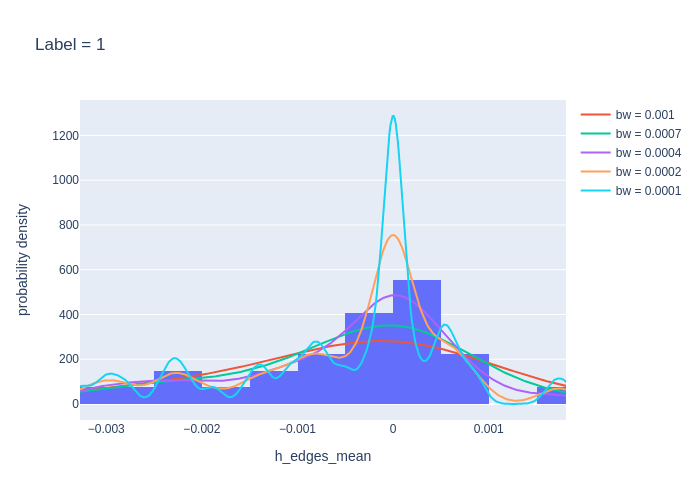

In [107]:
data[0]

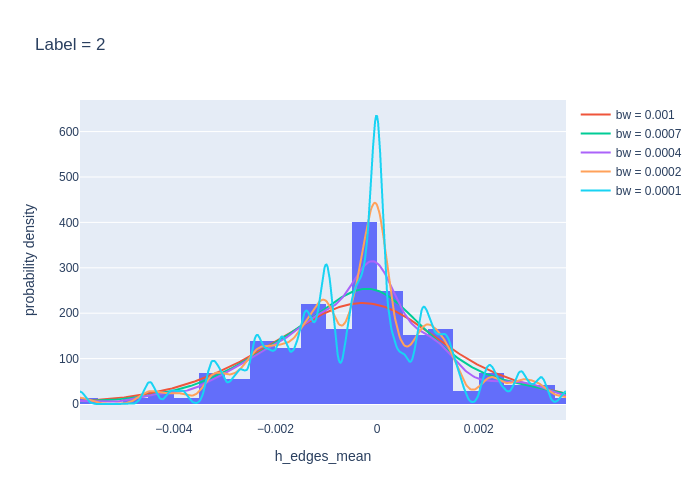

In [108]:
data[1]

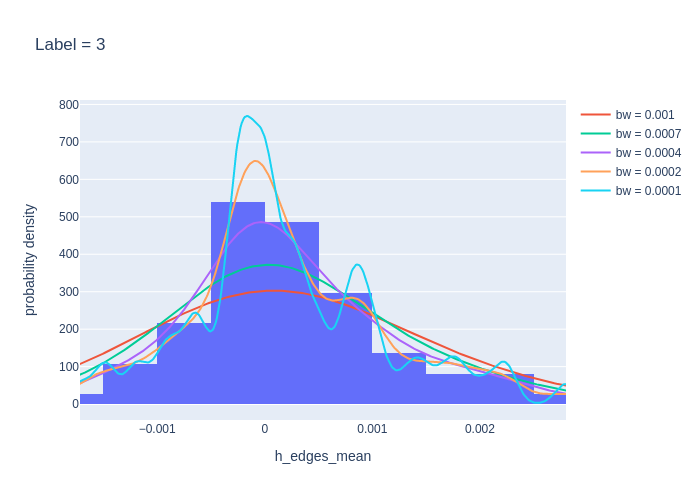

In [109]:
data[2]

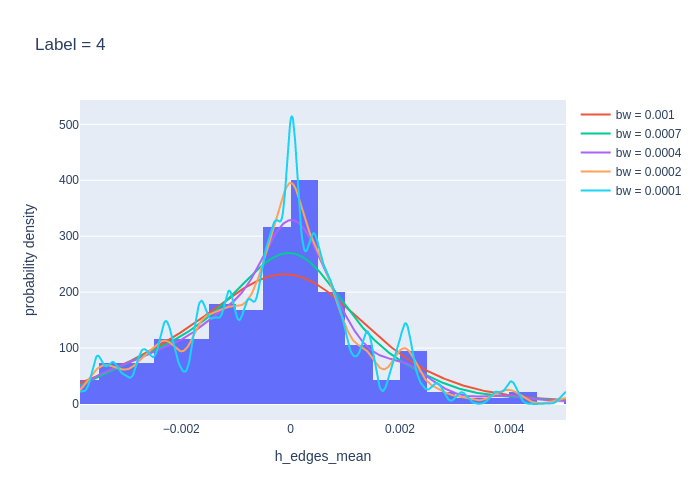

In [110]:
data[3]

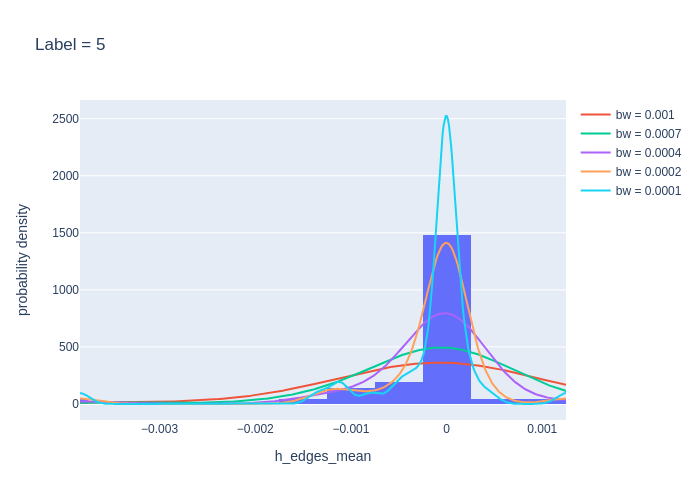

In [111]:
data[4]

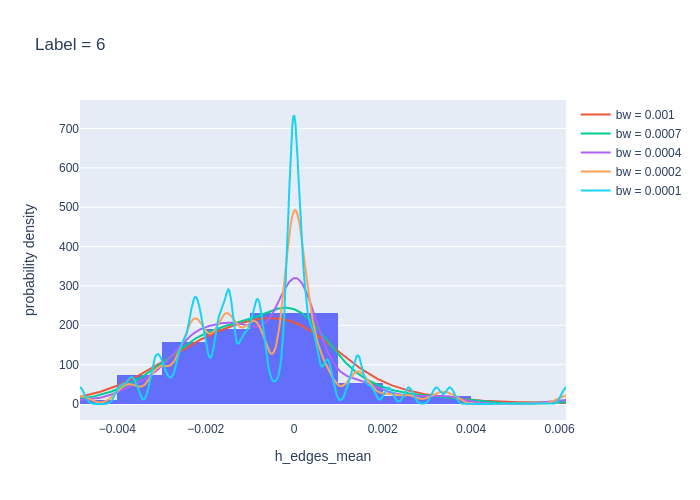

In [112]:
data[5]

### The best bandwidth for all cases = 0.0002



# Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?

## RGB Colors Means

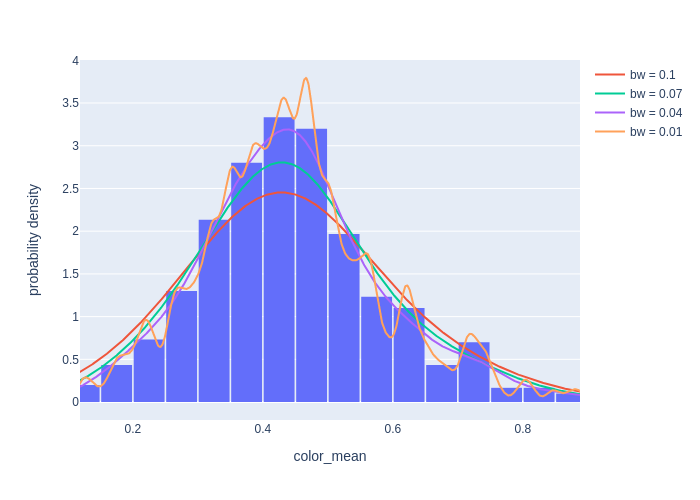

In [117]:
fig = px.histogram(df, x="color_mean", histnorm='probability density',nbins = 20)
kde = sm.nonparametric.KDEUnivariate(df['color_mean'])
kde.fit()
bandwidth = [0.1, 0.07, 0.04, 0.01]
for bw in bandwidth:
    kde.fit(bw=bw)
    fig.add_trace(go.Scatter(
        x=kde.support,
        y=kde.density,
        mode='lines',
        name=f'bw = {bw}'
    ))
fig.update_xaxes(range=[min(df['color_mean']), max(df['color_mean'])])
fig.update_layout(bargap=0.05)
fig.show()

### The best bandwidth for all cases = 0.04



## Horizontal Edges Means

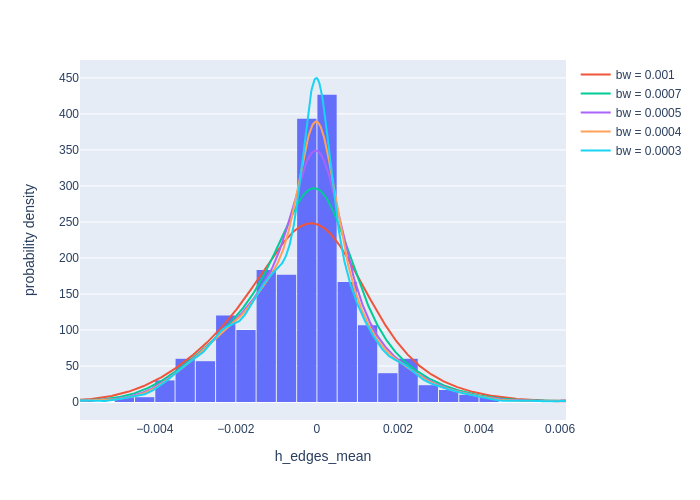

In [122]:
fig = px.histogram(df, x="h_edges_mean", histnorm='probability density',nbins = 25)
kde = sm.nonparametric.KDEUnivariate(df['h_edges_mean'])
kde.fit()
bandwidth = [0.001, 0.0007, 0.0005, 0.0004, 0.0003]
for bw in bandwidth:
    kde.fit(bw=bw)
    fig.add_trace(go.Scatter(
        x=kde.support,
        y=kde.density,
        mode='lines',
        name=f'bw = {bw}'
    ))
fig.update_xaxes(range=[min(df['h_edges_mean']), max(df['h_edges_mean'])])
fig.update_layout(bargap=0.05)
fig.show()

### The best bandwidth for all cases = 0.0003